In [13]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pylab as plt

In [6]:
mat_ref = loadmat("./data/two-stream/leapfrog_TSC_N_40000_Nm_1000_dt_0.01.mat")

In [11]:
# Stability and accuracy analysis
# Spatial resolution
mat_200 = loadmat("./data/two-stream/leapfrog_TSC_N_40000_Nm_200_dt_0.01.mat")
mat_400 = loadmat("./data/two-stream/leapfrog_TSC_N_40000_Nm_400_dt_0.01.mat")
mat_800 = loadmat("./data/two-stream/leapfrog_TSC_N_40000_Nm_800_dt_0.01.mat")

Text(0, 0.5, 'Energy')

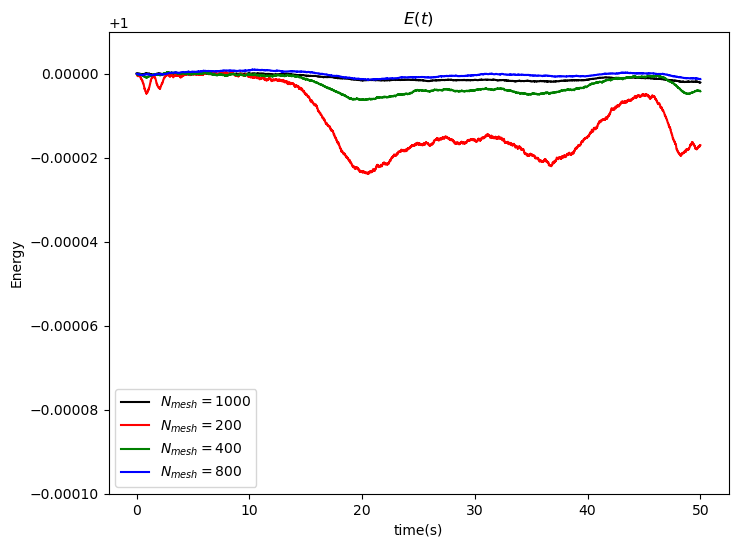

In [ ]:
# Energy conservation
H_ref = mat_ref['H'].reshape(-1)
H_200 = mat_200["H"].reshape(-1)
H_400 = mat_400["H"].reshape(-1)
H_800 = mat_800["H"].reshape(-1)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
tlins = np.linspace(0, 50, len(H_ref))

ax.plot(tlins, H_ref, "k-", label="$N_{mesh} = 1000$")
ax.plot(tlins, H_200, "r-", label="$N_{mesh} = 200$")
ax.plot(tlins, H_400, "g-", label="$N_{mesh} = 400$")
ax.plot(tlins, H_800, "b-", label="$N_{mesh} = 800$")
ax.legend()
ax.set_ylim([0.999900, 1.00001])
ax.set_title("$E(t)$")
ax.set_xlabel("time(s)")
ax.set_ylabel("Energy")

In [41]:
vth = mat_ref['vth']
wpe = np.sqrt(mat_ref['N']/mat_ref['L'])
debye = vth / wpe

print("Nmesh = 200 | CFL : {}".format(mat_200['L'] / mat_200['N_mesh'] < 3.4 * debye))
print("Nmesh = 400 | CFL : {}".format(mat_400["L"] / mat_400["N_mesh"] < 3.4 * debye))
print("Nmesh = 800 | CFL : {}".format(mat_800["L"] / mat_800["N_mesh"] < 3.4 * debye))
print("Nmesh = 1000 | CFL : {}".format(mat_ref["L"] / mat_ref["N_mesh"] < 3.4 * debye))

Nmesh = 200 | CFL : [[False]]
Nmesh = 400 | CFL : [[False]]
Nmesh = 800 | CFL : [[ True]]
Nmesh = 1000 | CFL : [[ True]]


In [49]:
snapshot_ref = mat_ref["snapshot"].reshape(80000, -1)
snapshot_200 = mat_200["snapshot"].reshape(80000, -1)
snapshot_400 = mat_400["snapshot"].reshape(80000, -1)
snapshot_800 = mat_800["snapshot"].reshape(80000, -1)

In [57]:
err_200 = []
err_400 = []
err_800 = []

for t_idx in range(snapshot_ref.shape[1]):
    err_200.append(np.linalg.norm(snapshot_200[:, t_idx] - snapshot_ref[:, t_idx]) / 80000)
    err_400.append(np.linalg.norm(snapshot_400[:, t_idx] - snapshot_ref[:, t_idx]) / 80000)
    err_800.append(np.linalg.norm(snapshot_800[:, t_idx] - snapshot_ref[:, t_idx]) / 80000)


err_200 = np.array(err_200)
err_400 = np.array(err_400)
err_800 = np.array(err_800)

Text(0, 0.5, '$L_2$ error')

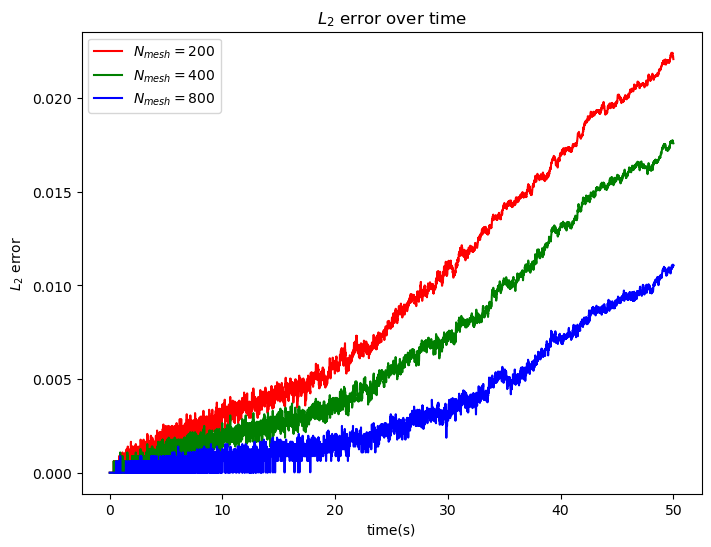

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
tlins = np.linspace(0, 50, len(H_ref))

ax.plot(tlins, err_200, "r-", label="$N_{mesh} = 200$")
ax.plot(tlins, err_400, "g-", label="$N_{mesh} = 400$")
ax.plot(tlins, err_800, "b-", label="$N_{mesh} = 800$")
ax.legend()
ax.set_title("$L_2$ error over time")
ax.set_xlabel("time(s)")
ax.set_ylabel("$L_2$ error")

Text(0, 0.5, 'Average $L_2$ error')

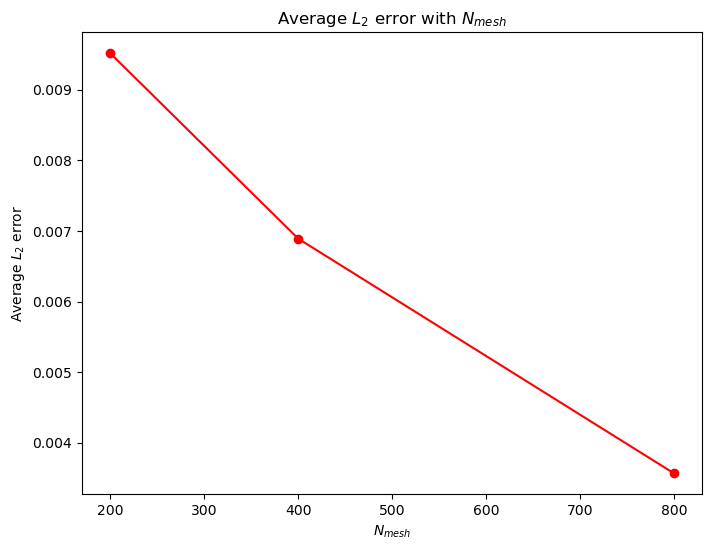

In [87]:
mean_err_200 = np.mean(err_200)
mean_err_400 = np.mean(err_400)
mean_err_800 = np.mean(err_800)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot([200, 400, 800], [mean_err_200, mean_err_400, mean_err_800], "ro-")
ax.set_title("Average $L_2$ error with $N_{mesh}$")
ax.set_xlabel("$N_{mesh}$")
ax.set_ylabel("Average $L_2$ error")

In [60]:
del snapshot_200
del snapshot_400
del snapshot_800

del mat_200
del mat_400
del mat_800

In [61]:
# Temporal resolution
mat_002 = loadmat("./data/two-stream/leapfrog_TSC_N_40000_Nm_1000_dt_0.02.mat")
mat_005 = loadmat("./data/two-stream/leapfrog_TSC_N_40000_Nm_1000_dt_0.05.mat")
mat_010 = loadmat("./data/two-stream/leapfrog_TSC_N_40000_Nm_1000_dt_0.1.mat")
mat_050 = loadmat("./data/two-stream/leapfrog_TSC_N_40000_Nm_1000_dt_0.5.mat")

Text(0, 0.5, 'Energy')

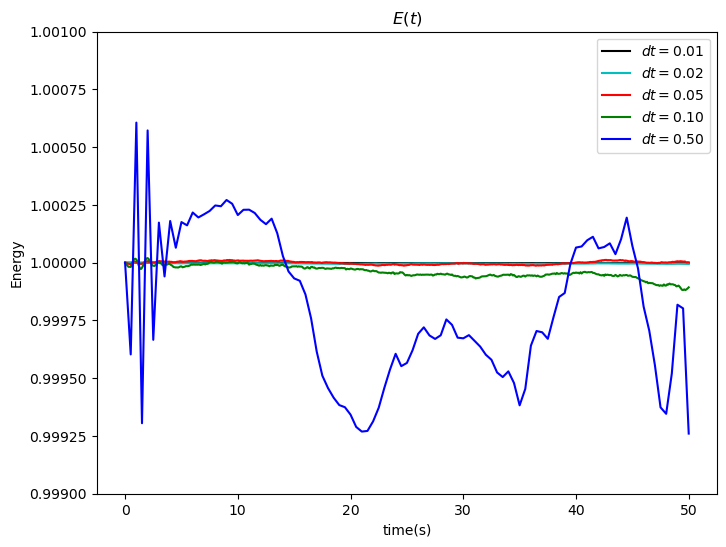

In [67]:
# Energy conservation
H_ref = mat_ref["H"].reshape(-1)
H_002 = mat_002["H"].reshape(-1)
H_005 = mat_005["H"].reshape(-1)
H_010 = mat_010["H"].reshape(-1)
H_050 = mat_050["H"].reshape(-1)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(np.linspace(0, 50, len(H_ref)), H_ref, "k-", label="$dt=0.01$")
ax.plot(np.linspace(0, 50, len(H_002)), H_002, "c-", label="$dt=0.02$")
ax.plot(np.linspace(0, 50, len(H_005)), H_005, "r-", label="$dt=0.05$")
ax.plot(np.linspace(0, 50, len(H_010)), H_010, "g-", label="$dt=0.10$")
ax.plot(np.linspace(0, 50, len(H_050)), H_050, "b-", label="$dt=0.50$")
ax.legend()
ax.set_ylim([0.999000, 1.00100])
ax.set_title("$E(t)$")
ax.set_xlabel("time(s)")
ax.set_ylabel("Energy")

In [86]:
vth = mat_ref["vth"]
wpe = np.sqrt(mat_ref["N"] / mat_ref["L"])
debye = vth / wpe

print("dt = 0.02 | CFL : {}".format(mat_002['dt'] < 2 / wpe))
print("dt = 0.05 | CFL : {}".format(mat_005['dt'] < 2 / wpe))
print("dt = 0.10 | CFL : {}".format(mat_010['dt'] < 2 / wpe))
print("dt = 0.50 | CFL : {}".format(mat_050['dt'] < 2 / wpe))

dt = 0.02 | CFL : [[ True]]
dt = 0.05 | CFL : [[ True]]
dt = 0.10 | CFL : [[False]]
dt = 0.50 | CFL : [[False]]


In [68]:
snapshot_002 = mat_002["snapshot"].reshape(80000, -1)
snapshot_005 = mat_005["snapshot"].reshape(80000, -1)
snapshot_010 = mat_010["snapshot"].reshape(80000, -1)
snapshot_050 = mat_050["snapshot"].reshape(80000, -1)

In [79]:
phase_ref = snapshot_ref[:,::50]
phase_002 = snapshot_002[:,::25]
phase_005 = snapshot_005[:,::10]
phase_010 = snapshot_010[:,::5]
phase_050 = snapshot_050

In [82]:
err_002 = []
err_005 = []
err_010 = []
err_050 = []

for t_idx in range(phase_ref.shape[1]):
    err_002.append(np.linalg.norm(phase_002[:, t_idx] - phase_ref[:, t_idx]) / 80000)
    err_005.append(np.linalg.norm(phase_005[:, t_idx] - phase_ref[:, t_idx]) / 80000)
    err_010.append(np.linalg.norm(phase_010[:, t_idx] - phase_ref[:, t_idx]) / 80000)
    err_050.append(np.linalg.norm(phase_050[:, t_idx] - phase_ref[:, t_idx]) / 80000)

err_002 = np.array(err_002)
err_005 = np.array(err_005)
err_010 = np.array(err_010)
err_050 = np.array(err_050)

Text(0, 0.5, '$L_2$ error')

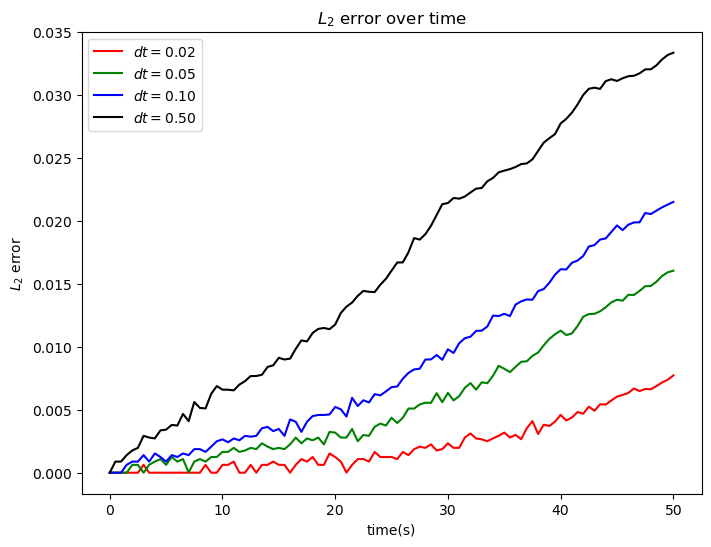

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
tlins = np.linspace(0, 50, phase_ref.shape[1])

ax.plot(tlins, err_002, "r-", label="$dt=0.02$")
ax.plot(tlins, err_005, "g-", label="$dt=0.05$")
ax.plot(tlins, err_010, "b-", label="$dt=0.10$")
ax.plot(tlins, err_050, "k-", label="$dt=0.50$")
ax.legend()
ax.set_title("$L_2$ error over time")
ax.set_xlabel("time(s)")
ax.set_ylabel("$L_2$ error")

Text(0, 0.5, 'Average $L_2$ error')

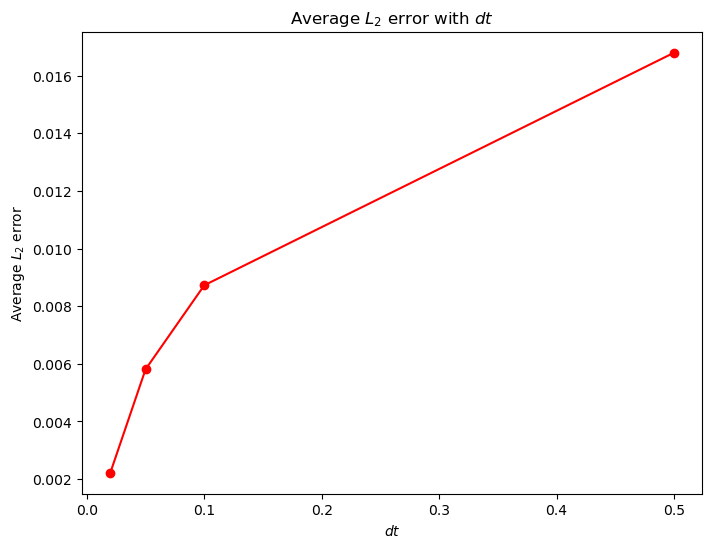

In [88]:
mean_err_002 = np.mean(err_002)
mean_err_005 = np.mean(err_005)
mean_err_010 = np.mean(err_010)
mean_err_050 = np.mean(err_050)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot([0.02, 0.05, 0.10, 0.50], [mean_err_002, mean_err_005, mean_err_010, mean_err_050], "ro-")
ax.set_title("Average $L_2$ error with $dt$")
ax.set_xlabel("$dt$")
ax.set_ylabel("Average $L_2$ error")

In [ ]:
# Time complexity